# Call Data

In [ ]:
import pandas as pd
import numpy as np

lyrics_df = pd.read_excel('/content/databersih (2).xlsx')
ground_truth_df = pd.read_excel('/content/GT UAS NLP fix.xlsx')


In [ ]:
lyrics_df

,no,artist,album,year,title,lyrics
0,1,Adele,19,2008,Chasing Pavements,I've made up my mind\nDon't need to think it o...
1,2,Adele,19,2008,Cold Shoulder,\nYou say it's all in my head\nAnd the things ...
2,3,Adele,19,2008,Hometown Glory,I've been walking in the same way as I did\nMi...
3,4,Adele,19,2008,Make You Feel My Love,When the rain is blowing in your face\nAnd the...
4,5,Adele,19,2008,My Same,"Aye, aye, aye-aye\nAye, aye, aye-aye\nAye, aye..."
...,...,...,...,...,...,...
4907,4908,XXXTentacion,The Fall,2014,The Fall,Fool's gold is a common man's trash\nI've seen...
4908,4909,XXXTentacion,The Fall,2014,​ghost,Shtuom ruo neewteb seid ecapS tuo dna ni revO\...
4909,4910,XXXTentacion,The Fall,2014,​white girl,"Haha\nYou know, gang, gang, bitch\nXXX, pussy ..."
4910,4911,XXXTentacion,Willy Wonka Was a Child Murderer,2016,Willy Wonka Was a Child Murderer,"Yeah\nIt's all in my, it's all in my head\nIt'..."


# EDA

In [ ]:
df = lyrics_df

In [ ]:
artist_counts = df['artist'].value_counts()
album_counts = df['album'].value_counts()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


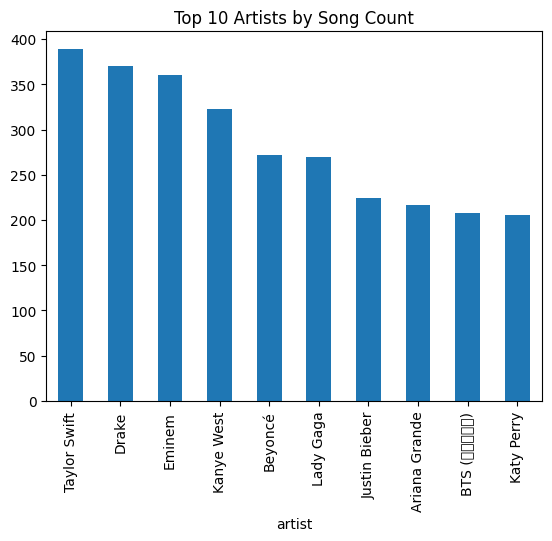

In [ ]:
import matplotlib.pyplot as plt
artist_counts.head(10).plot(kind='bar', title='Top 10 Artists by Song Count')
plt.show()


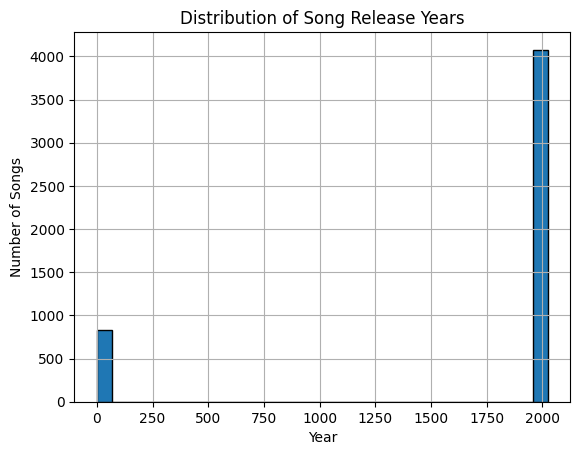

In [ ]:
df['year'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Song Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


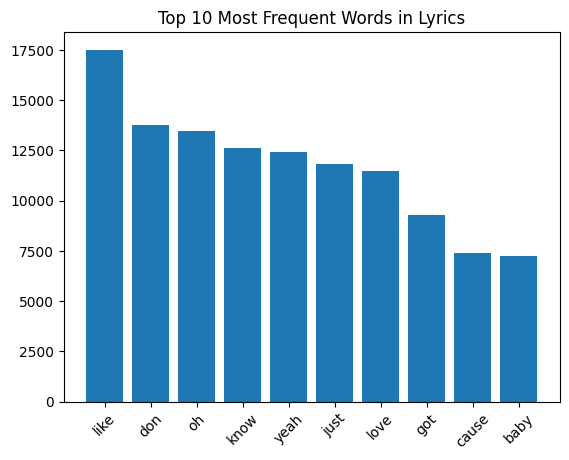

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['lyrics'])
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_count = dict(zip(words, word_freq))

# Visualisasi kata-kata teratas
sorted_words = sorted(word_count.items(), key=lambda item: item[1], reverse=True)
top_words = dict(sorted_words[:10])
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 10 Most Frequent Words in Lyrics')
plt.xticks(rotation=45)
plt.show()


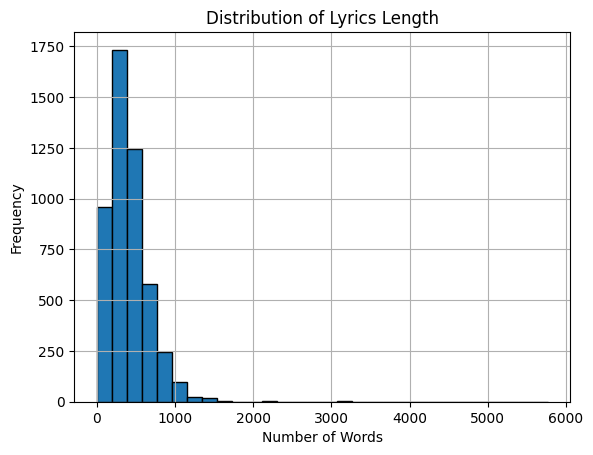

In [ ]:
df['lyrics_length'] = df['lyrics'].apply(lambda x: len(x.split()))
df['lyrics_length'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Lyrics Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
